In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy import stats
import model
import importlib

In [11]:
data = pd.read_csv("data.csv", sep=";")
data

,Unnamed: 0,leeftijd,geslacht,email,pdBekend,opmerkingen,id,after_coop_coop_rate25,after_defect_coop_rate25,coop_rate25,...,D11comp50,D12comp50,D21comp50,D22comp50,prebias_a1,prebias_b1,real_score,lib_score,mixed_score_lower_is_lib,politics
0,0,19,vrouw,Beausemil04@gmail.com,ja,Ik vond het een leuke enquête! Succes met je o...,0jd1yl8p6,1.0,0.000000,0.4,...,0.2,0.2,0.4,0.2,0.011364,0.559564,0.742857,0.857143,0.469388,realist
1,1,57,man,Hein.vanmiddelaar@p2.nl,ja,NaN,0uaijewzl,1.0,1.000000,1.0,...,0.6,0.4,0.0,0.0,NaN,NaN,0.714286,0.785714,0.489796,realist
2,2,31,vrouw,NaN,ja,Misschien heb ik iets gemist maar de uitleg va...,17eq7pp6f,NaN,1.000000,1.0,...,0.4,0.6,0.0,0.0,NaN,NaN,0.542857,0.750000,0.387755,realist
3,3,57,man,NaN,nee,NaN,1cn018l7w,0.0,0.000000,0.0,...,0.0,0.0,0.6,0.4,NaN,NaN,0.514286,0.785714,0.346939,liberalist
4,4,20,man,Ikwilnietwinnen@hotmail.com,ja,Vond het leuk,1feix2wxq,1.0,0.333333,0.4,...,0.2,0.2,0.2,0.4,0.396578,0.023845,0.628571,0.750000,0.448980,realist
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,122,NaN,NaN,NaN,NaN,NaN,kj2ei8uyi,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.514286,0.821429,0.326531,liberalist
123,123,NaN,NaN,NaN,NaN,NaN,momn66jov,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.628571,0.785714,0.428571,realist
124,124,NaN,NaN,NaN,NaN,NaN,nbl87yduk,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.485714,0.642857,0.408163,realist
125,125,NaN,NaN,NaN,NaN,NaN,xhzp8wazv,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.600000,0.857143,0.367347,liberalist


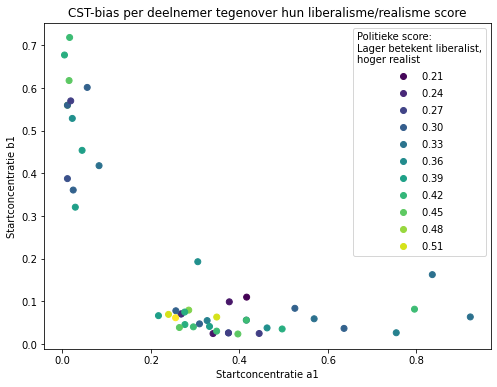

In [27]:


fig, ax = plt.subplots(figsize=(8,6))

scatter = ax.scatter(data["prebias_a1"], data["prebias_b1"], c=data["mixed_score_lower_is_lib"])
ax.legend(*scatter.legend_elements(), title="Politieke score:\nLager betekent liberalist,\nhoger realist")
ax.set_title("CST-bias per deelnemer tegenover hun liberalisme/realisme score")
ax.set_xlabel("Startconcentratie a1")
ax.set_ylabel("Startconcentratie b1")
plt.show()

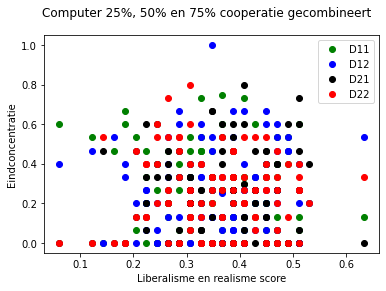

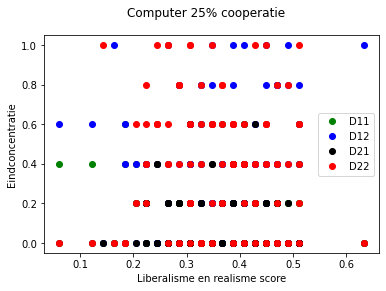

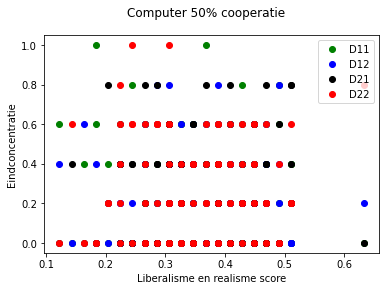

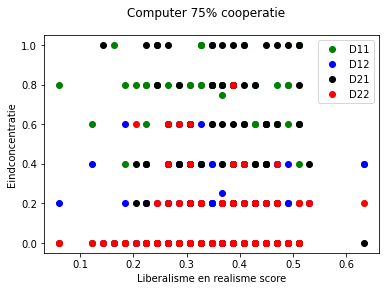

In [28]:
def de_dink_plot(data, name="", title=""):
    x = data["mixed_score_lower_is_lib"]
    plt.plot(x, data["D11"+name], "o", label="D11", c="green")
    plt.plot(x, data["D12"+name], "o", label="D12", c="blue")
    plt.plot(x, data["D21"+name], "o", label="D21", c="black")
    plt.plot(x, data["D22"+name], "o", label="D22", c="red")
    plt.suptitle(title)
    plt.xlabel("Liberalisme en realisme score")
    plt.ylabel("Eindconcentratie")
    plt.legend()
    plt.show()
    
de_dink_plot(data, title="Computer 25%, 50% en 75% cooperatie gecombineert")
de_dink_plot(data, name="comp25", title="Computer 25% cooperatie")
de_dink_plot(data, name="comp50", title="Computer 50% cooperatie")
de_dink_plot(data, name="comp75", title="Computer 75% cooperatie")

No handles with labels found to put in legend.


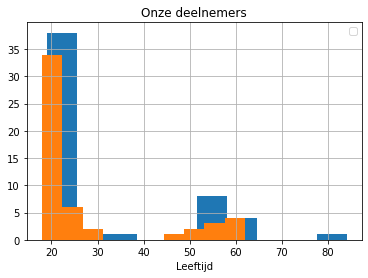

In [6]:
data["leeftijd"] = pd.to_numeric(data["leeftijd"], errors='coerce')
data.groupby("geslacht")["leeftijd"].hist()
plt.legend()
plt.title("Onze deelnemers")
plt.xlabel("Leeftijd")
plt.show()

In [42]:
import sympy
import sympy.printing as printing

e1, e2, e3, e4 = sympy.symbols("e1 e2 e3 e4")
before = np.array([0.5, 0.5, 0.5, 0.5,
                   0, 0, 0, 0])

change = np.array([-(e1 + e2), -(e3 + e4),
                   -(e1 + e3), -(e2 + e4),
                   e1, e2, e3, e4])

end = before + change

molefrac = end / np.sum(end)

KA11 = molefrac[4] / (molefrac[0] * molefrac[2])
KA12 = molefrac[5] / (molefrac[0] * molefrac[3])
KA21 = molefrac[6] / (molefrac[1] * molefrac[2])
KA22 = molefrac[7] / (molefrac[1] * molefrac[3])

KA11_ = np.exp(-1)
KA12_ = np.exp(-5)
KA21_ = np.exp(-0)
KA22_ = np.exp(-3)

sympy.pprint(KA11 - KA11_)
sympy.pprint(KA12 - KA12_)
sympy.pprint(KA21 - KA21_)
sympy.pprint(KA22 - KA22_)
printing.latex(KA12 - KA12_)

                                                     2                        
      4.0⋅e₁⋅(-0.5⋅e₁ - 0.5⋅e₂ - 0.5⋅e₃ - 0.5⋅e₄ + 1)                         
──────────────────────────────────────────────────────────── - 0.3678794411714
(-e₁ - e₂ + 0.5)⋅(-e₁ - e₃ + 0.5)⋅(-e₁ - e₂ - e₃ - e₄ + 2.0)                  

  
  
42
  
                                                     2                        
      4.0⋅e₂⋅(-0.5⋅e₁ - 0.5⋅e₂ - 0.5⋅e₃ - 0.5⋅e₄ + 1)                         
──────────────────────────────────────────────────────────── - 0.0067379469990
(-e₁ - e₂ + 0.5)⋅(-e₂ - e₄ + 0.5)⋅(-e₁ - e₂ - e₃ - e₄ + 2.0)                  

    
    
8547
    
                                                     2            
      4.0⋅e₃⋅(-0.5⋅e₁ - 0.5⋅e₂ - 0.5⋅e₃ - 0.5⋅e₄ + 1)             
──────────────────────────────────────────────────────────── - 1.0
(-e₁ - e₃ + 0.5)⋅(-e₃ - e₄ + 0.5)⋅(-e₁ - e₂ - e₃ - e₄ + 2.0)      
                                                     2            

'\\frac{4.0 e_{2} \\left(- 0.5 e_{1} - 0.5 e_{2} - 0.5 e_{3} - 0.5 e_{4} + 1\\right)^{2}}{\\left(- e_{1} - e_{2} + 0.5\\right) \\left(- e_{2} - e_{4} + 0.5\\right) \\left(- e_{1} - e_{2} - e_{3} - e_{4} + 2.0\\right)} - 0.00673794699908547'